![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.



### Instructions

1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.


2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [1]:
# 1.Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2.Reading data
churnData = pd.read_csv("files_for_lab/Customer-Churn.csv")
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
# 3.Changing TotalCharges to numeric
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [4]:
# 4.Dealing with null values
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
meanTC = churnData['TotalCharges'].mean()
meanTC

2283.3004408418697

In [6]:
churnData["TotalCharges"].fillna(meanTC, inplace=True)

In [7]:
# 5.1 Scaling numeric features
num=churnData.select_dtypes(np.number)
num.head()

standard = StandardScaler().fit(num)
standard_data = standard.transform(num)
standard_data = pd.DataFrame(standard_data, columns=num.columns)
standard_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


# 1. Apply SMOTE for upsampling

In [8]:
churnData.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
X = standard_data
y = churnData['Churn']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Resample the training data only
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [11]:
# Train your classifier on the resampled training data
classification = LogisticRegression(random_state=42, multi_class='ovr').fit(X_resampled, y_resampled)
predictions = classification.predict(X_test)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

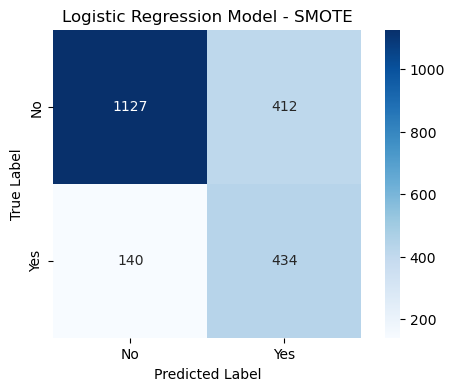

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Logistic Regression Model - SMOTE")
plt.show()

In [13]:
print("Accuracy of the Logistic Regression model is:", accuracy)

Accuracy of the Logistic Regression model is: 0.738760056791292


#### Now we will try with Decission Tree

In [14]:
# Train your classifier on the resampled training data
classification = DecisionTreeClassifier(random_state=42).fit(X_resampled, y_resampled)
predictions = classification.predict(X_test)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

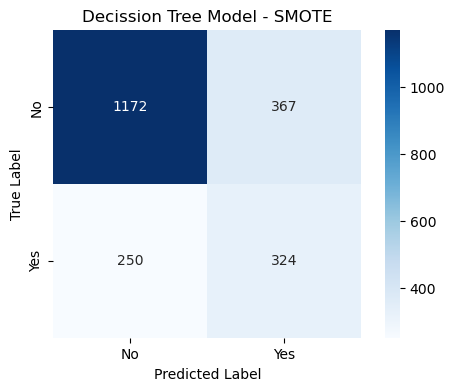

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Decission Tree Model - SMOTE")
plt.show()

In [16]:
print("Accuracy of the Decission Tree model is:", accuracy)

Accuracy of the Decission Tree model is: 0.7079981069569332


<div style="background-color: #E7F4E7; border-left: 10px solid #60C060; padding: 10px;">
    <strong>Comparisson</strong>
    <p>Logistic Regression has better accuracy</p>
</div>

# 2. Apply TomekLinks for downsampling

In [17]:
churnData.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
X = standard_data
y = churnData['Churn']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Resample the training data only
X_resampled, y_resampled = TomekLinks(sampling_strategy='majority').fit_resample(X_train, y_train)

In [20]:
# Train your classifier on the resampled training data
classification = LogisticRegression(random_state=42, multi_class='ovr').fit(X_resampled, y_resampled)
predictions = classification.predict(X_test)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

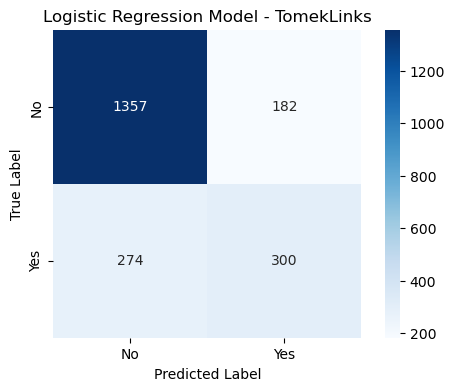

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Logistic Regression Model - TomekLinks")
plt.show()

In [22]:
print("Accuracy of the Logistic Regression model is:", accuracy)

Accuracy of the Logistic Regression model is: 0.7841930903928065


In [23]:
# Train your classifier on the resampled training data
classification = DecisionTreeClassifier(random_state=42).fit(X_resampled, y_resampled)
predictions = classification.predict(X_test)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

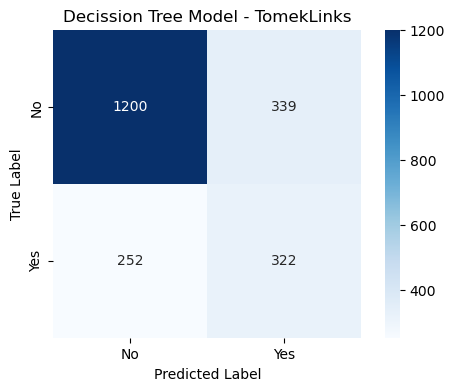

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Decission Tree Model - TomekLinks")
plt.show()

In [25]:
print("Accuracy of the Decission Tree model is:", accuracy)

Accuracy of the Decission Tree model is: 0.7203028868906768


<div style="background-color: #E7F4E7; border-left: 10px solid #60C060; padding: 10px;">
    <strong>Final Conclusions</strong>
    <p>Logistic Regression TomekLinks is the best model if we look for accuracy</p>
</div>